In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation

In [28]:
def get_normalized_data():
    print("Reading in and transforming data...")
    
    
    df = pd.read_csv('C:/Users/TANNERU/Downloads/train.csv/train.csv')
    #print(df)
    data = df.values.astype(np.float32)
    #print(data)
    
    np.random.shuffle(data)
    
    
    X = data[:,1:] #except 1 columns
    Y = data[:,0].astype(np.int32) #only 1st column
    print("Innputs",X)
    print("output",Y)
    print(X.shape) #(42000, 784)
    print(Y.shape) #(42000,)
    
    
    Xtrain = X[:-1000]
    Xtest = X[-1000:]
    Ytrain = Y[:-1000]
    Ytest = Y[-1000:]
    print("Xtrain",Xtrain.shape)#(41000, 784)
    print("Xtest",Xtest.shape)#(1000, 784)
    print("Ytrain",Ytrain.shape)#(41000,)
    print("Ytest",Ytest.shape) #(1000,)
    
    
    mu = Xtrain.mean(axis = 0) #(784,)
    std = Xtrain.std(axis = 0) 
    np.place(std,std == 0,1) # changes all values to 0,1
    print(np.place(std,std == 0,1))
    #print(mu)
    print(mu.shape)#(784,)
    
    
    #center the data
    Xtrain = (Xtrain - mu)/std
    Xtest = (Xtest - mu)/std
    print(Xtrain)
    print(Xtest)
    
    
    return Xtrain,Xtest,Ytrain,Ytest

In [29]:
Xtrain,Xtest,Ytrain,Ytest = get_normalized_data()

Reading in and transforming data...
Innputs [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
output [4 0 5 ... 0 4 5]
(42000, 784)
(42000,)
Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)
None
(784,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
print("Xtrain",Xtrain.shape)#(41000, 784)
print("Xtest",Xtest.shape)#(1000, 784)
print("Ytrain",Ytrain.shape)#(41000,)
print("Ytest",Ytest.shape) #(1000,)

Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)


In [31]:
N,D = Xtrain.shape
print(N) #41000
print(D)#784

41000
784


In [32]:
K = len(set(Ytrain))
print(K) #4

10


In [33]:
print(np.unique(Ytrain))

[0 1 2 3 4 5 6 7 8 9]


In [34]:
print(Ytrain)

[4 0 5 ... 7 9 8]


In [35]:
Ytrain = Ytrain.reshape(-1,1)
Ytest = Ytest.reshape(-1,1)

In [36]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(categories = 'auto')
Ytrain = onehot.fit_transform(Ytrain).toarray()
Ytest = onehot.fit_transform(Ytest).toarray()

In [37]:
print(Ytrain)
print(Ytrain.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
(41000, 10)


In [38]:
print(Ytest)
print(Ytest.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1000, 10)


In [40]:
#model will be sequential 
model = Sequential()
#ANN with layer [784]-->[500]-->[300]-->[10]
#Hidden layer1
model.add(Dense(units = 500,input_dim = D))# 500 neurons with 784 dimensions #Linear transformation(X.dot(W)+b)
model.add(Activation('relu')) # applying activation to the linear transformation
#Hidden Layer2
model.add(Dense(units = 300)) #dimensions automatically it will take &  don't need to specify input_dim
model.add(Activation('relu'))
#Output layer
model.add(Dense(units = K))
model.add(Activation('softmax'))


#compliling
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])



In [41]:
#fitting the model
r = model.fit(Xtrain,Ytrain,validation_data = (Xtest,Ytest),epochs = 15,batch_size = 32)
print("fitting",r)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 41000 samples, validate on 1000 samples
Epoch 1/15
41000/41000 [==============================] - 14s 333us/step - loss: 0.2448 - acc: 0.9306 - val_loss: 0.1418 - val_acc: 0.9560
Epoch 2/15
41000/41000 [==============================] - 13s 317us/step - loss: 0.1170 - acc: 0.9673 - val_loss: 0.1383 - val_acc: 0.9580
Epoch 3/15
41000/41000 [==============================] - 13s 323us/step - loss: 0.0818 - acc: 0.9754 - val_loss: 0.1225 - val_acc: 0.9640
Epoch 4/15
41000/41000 [==============================] - 14s 336us/step - loss: 0.0668 - acc: 0.9813 - val_loss: 0.1319 - val_acc: 0.9670
Epoch 5/15
41000/41000 [==============================] - 14s 342us/step - loss: 0.0559 - acc: 0.9838 - val_loss: 0.1010 - val_acc: 0.9770
Epoch 6/15
41000/41000 [==============================] - 13s 327us/step - loss: 0.0691 - acc: 0.9822 - val_loss: 0.1543 - val_acc: 0.9710
Epoch 7/15
41000/41000

In [42]:
#keys 
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


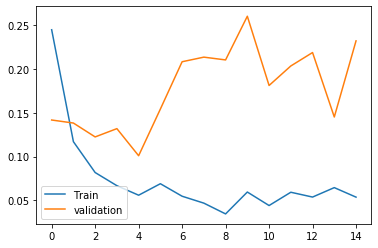

In [45]:
#visulaiztion for Costs
plt.plot(r.history['loss'],label = 'Train')
plt.plot(r.history['val_loss'],label = 'validation')
plt.legend()
plt.show()

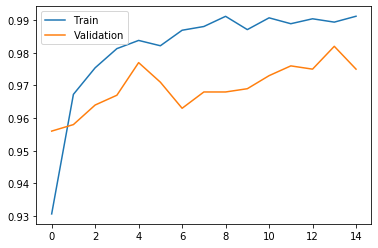

In [46]:
#visulaiztion for Accuracy
plt.plot(r.history['acc'],label = 'Train')
plt.plot(r.history['val_acc'],label = 'Validation')
plt.legend()
plt.show()